# Titanic Survivor Machine Learning

## *Initial Modules*

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression

## *Preparing Dataset*

### 1. Load Data

In [2]:
Trainx = pd.read_csv('./titan_data/train.csv')
Testx = pd.read_csv('./titan_data/test.csv')
Allx = [Trainx, Testx]
# This will combine the Train data and Test Data

Why did we combine Train data and Test Data?
It depend on you to combine the data or not. Let's try to look the data.

### 2. Describe Data

In [3]:
#Shape of Train Data
print("Number of Train's Row is",Trainx.shape[1],"\n")
print("Number of Train's Column is",Trainx.shape[0],'\n')
print("Suvived Columns is the TARGETED Value.\n")

print('='*70)

#Print Column Name
print("\nName of Train's Columns are : \n")
print(Trainx.columns.values)
#Column and size from Testx Data is also same as Trainx Data

Number of Train's Row is 12 

Number of Train's Column is 891 

Suvived Columns is the TARGETED Value.


Name of Train's Columns are : 

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


Explained of Columns's Name :
1. *PassengerId* = that's for ID Passager for unique data. Created by system.
2. *Survived* = Consist of survived or not, valued by 0 for died and 1 for survived
3. *Pclass* = Passenger class of room, consist of 1st Upper, 2nd Middle, and 3rd Lower class.
4. *Name* = Mandatory
5. *Sex* = Mandatory
6. *Age* = Mandatory
7. *SibSp* = Number of sibling or Spouses abroad
8. *Parch* = Number of Parents or children abroad
9. *Ticket* = Ticket number
10. *Fare* = Passenger Fare (British Pound) for ticket fee
11. *Cabin* = Mandatory
12. *Embarked* = Port of Embarkation, consist of C for Cherbourg, Q for Queenstown, and S for Southampton

In [4]:
#Preview sample of Train's Head Data (We make 8 row first) :
Trainx.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [5]:
#We will print the column information for Train Data
print(Trainx.info())

print('\n')
print('='*70)

print('\nAnother Way you could did like this :\n')
print(Trainx.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None



Another Way you could did like this :

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Based on type Data, we could classified all features :
1. **Categorical** = "Sex" and "Embarked"
2. **Ordinal** = "Pclass"
3. **Continuous Numeric** = "Age" and "Fare"
4. **Discrete Numeric** = "SibSp" and "Parch"
5. **Alphanumeric** = "Name", "Ticket", and "Cabin"

Name may contain many error/typos. Based on Results, we know that 5 features are strings (object).

In [6]:
print("Let's check the Missing Column :\n\n")
colx = Trainx.columns.values.tolist()

for i in range(len(colx)) :
    x = sum(Trainx[Trainx.columns[i]].isna())
    #isna() will give you same value as isnull()
    if x>0 :
        y = x/Trainx.shape[0]*100
        print('Number of Missing value (NAN) in column',colx[i],'is : {:d} items or {:0.2f}%.'.format(x,y))
        print('='*75)

Let's check the Missing Column :


Number of Missing value (NAN) in column Age is : 177 items or 19.87%.
Number of Missing value (NAN) in column Cabin is : 687 items or 77.10%.
Number of Missing value (NAN) in column Embarked is : 2 items or 0.22%.


In [7]:
print("Let's show Statistics Summary for Trainning Data :")
Trainx.describe()

Let's show Statistics Summary for Trainning Data :


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


It will better if we focus on Numerical Category first.

#### Numerical Variable

In [8]:
def decstat(xid) :
    print('Here the Description Statistic for',xid,'column.')    
    print('Mean {:10.2f}'.format(Trainx[xid].mean()))
    print('Median{:10.2f}'.format(Trainx[xid].median()))
    print('Variance{:10.2f}'.format(Trainx[xid].var()))
    print('Standar Deviation{:6.2f}'.format(Trainx[xid].var()**(.5)))
    print('Minimum{:10.2f}'.format(Trainx[xid].min()))
    print('Maximum{:10.2f}'.format(Trainx[xid].max()))
    print('Kurtosis{:10.2f}'.format(Trainx[xid].kurt()))
    print('Missing Value {:2.2f}'.format(sum(Trainx[xid].isnull())))
    
decstat('Age')
print('='*70)

decstat('Fare')
print('='*70)

decstat('SibSp')
print('Discrete Count')
print(Trainx['SibSp'].value_counts())
a=(Trainx['SibSp'].value_counts()).to_list()
b=(sum(a)-a[0])/sum(a)*100
print('As {:0.2f}% passanger have sibling abroad the ship.'.format(b))
print('='*70)

decstat('Parch')
print('Discrete Count')
print(Trainx['Parch'].value_counts())
a1=(Trainx['Parch'].value_counts()).to_list()
b1=(sum(a1)-a1[0])/sum(a1)*100
print('As {:0.2f}% passanger have children/parent abroad the ship.'.format(b1))
print('='*70)

decstat('Survived')
print(Trainx['Survived'].value_counts())
a2=(Trainx['Survived'].value_counts()).to_list()
b2=(sum(a2)-a2[0])/sum(a2)*100
print('As {:0.2f}% passanger was survived.'.format(b2))
print('='*70)

Here the Description Statistic for Age column.
Mean      29.70
Median     28.00
Variance    211.02
Standar Deviation 14.53
Minimum      0.42
Maximum     80.00
Kurtosis      0.18
Missing Value 177.00
Here the Description Statistic for Fare column.
Mean      32.20
Median     14.45
Variance   2469.44
Standar Deviation 49.69
Minimum      0.00
Maximum    512.33
Kurtosis     33.40
Missing Value 0.00
Here the Description Statistic for SibSp column.
Mean       0.52
Median      0.00
Variance      1.22
Standar Deviation  1.10
Minimum      0.00
Maximum      8.00
Kurtosis     17.88
Missing Value 0.00
Discrete Count
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
As 31.76% passanger have sibling abroad the ship.
Here the Description Statistic for Parch column.
Mean       0.38
Median      0.00
Variance      0.65
Standar Deviation  0.81
Minimum      0.00
Maximum      6.00
Kurtosis      9.78
Missing Value 0.00
Discrete Count
0    678
1    118
2     80
5      5


Here is describe for String Data in Train :

In [9]:
Trainx.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"West, Mr. Edwy Arthur",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [10]:
print("Let's look at 'Sex' and 'Embarked' as categorical feature with smallest unique.\n")
print('='*70)
print(Trainx['Sex'].value_counts())
print('='*70)
print(Trainx['Embarked'].value_counts())

Let's look at 'Sex' and 'Embarked' as categorical feature with smallest unique.

male      577
female    314
Name: Sex, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


### 3. Conclusion from Data Describe

- Only Age, Cabin, and Embarked feature which have null values
- Number of null value : Cabin > Age > Embarked

**What is the distribution of numerical feature values across the samples?**
- Total samples are 891 or 40.1% of the actual number of passengers on board the Titanic (2,224).
- Survived is a categorical feature with 0 or 1 values.
- Nearly 32% of the passengers had siblings and/or spouse aboard.
- Nearly 24% of the passengers had parents and/or children aboard.
- Fares varied significantly with few passengers (<1%) paying as high as $512.
- Few elderly passengers (<1%) within age range 65-80.

**What is the distribution of categorical features?**
- Names are unique across the dataset (count=unique=891)
- Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
- Cabin values have several duplicates across samples. Alternatively several passengers shared a cabin.
- Embarked takes three possible values. S port used by most passengers (top=S)
- Ticket feature has high ratio (22%) of duplicate values (unique=681).

### 3. Pivoting Features

We tried to pivot features to it's target.

In [11]:
#Pclass
print('Pivot PCLASS to Survived')
a3 = Trainx[['Pclass', 'Survived']].groupby(['Pclass'],
as_index=False).mean().sort_values(by='Pclass', ascending=True)
print('This is mean of Survived based on Pclass as the category.')
b3=a3.iloc[0,1]*100
print('As {:0.2f}% of average of passanger in Upper Class was survived.'.format(b3))
b4=(1-a3.iloc[2,1])*100
print('But {:0.2f}% of average of passanger in Lower Class was died.'.format(b4))
a3

Pivot PCLASS to Survived
This is mean of Survived based on Pclass as the category.
As 62.96% of average of passanger in Upper Class was survived.
But 75.76% of average of passanger in Lower Class was died.


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
#Sex
print('Pivot SEX to Survived')
s1 = Trainx[['Sex','Survived']].groupby(['Sex'],
as_index=False).mean().sort_values(by='Sex', ascending=True)
print('This is mean of Survived based on Sex as the category.')
s2 =s1.iloc[0,1]*100
print('As {:0.2f}% of average of Female passanger was survived.'.format(s2))
s1

Pivot SEX to Survived
This is mean of Survived based on Sex as the category.
As 74.20% of average of Female passanger was survived.


,Sex,Survived
0,female,0.742038
1,male,0.188908


Let's look at Pivot table between Sex and Pclass with mean Survived Pasengger.

In [13]:
Trainx.pivot_table(index='Pclass', 
columns='Sex', values='Survived', aggfunc='mean')

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


In [14]:
Trainx[['Pclass','Survived','Sex']].groupby(['Pclass','Sex'],
as_index=False).mean().sort_values(by='Sex', ascending=True)

,Pclass,Sex,Survived
0,1,female,0.968085
2,2,female,0.921053
4,3,female,0.500000
1,1,male,0.368852
3,2,male,0.157407
5,3,male,0.135447


In [15]:
print('Pivot EMBARKED to Survived')
Trainx[['Embarked','Survived','Sex']].groupby(['Embarked','Sex'],
as_index=False).mean().sort_values(by='Sex', ascending=True)

Pivot EMBARKED to Survived


,Embarked,Sex,Survived
0,C,female,0.876712
2,Q,female,0.750000
4,S,female,0.689655
1,C,male,0.305263
3,Q,male,0.073171
5,S,male,0.174603


In [16]:
print('Pivot SIBSP to Survived')
Trainx[['SibSp','Survived','Sex']].groupby(['SibSp','Sex'],
as_index=False).mean().sort_values(by='Sex', ascending=True)

Pivot SIBSP to Survived


,SibSp,Sex,Survived
0,0,female,0.787356
2,1,female,0.754717
4,2,female,0.769231
6,3,female,0.363636
8,4,female,0.333333
10,5,female,0.000000
12,8,female,0.000000
1,0,male,0.168203
3,1,male,0.310680
5,2,male,0.200000


In [17]:
print('Pivot Sex vs Survived passanger in SibSp Rate')
Trainx[['SibSp','Survived','Sex']].groupby(['Sex','Survived'],
as_index=False).mean().sort_values(by='Survived', ascending=True)

Pivot Sex vs Survived passanger in SibSp Rate


,Sex,Survived,SibSp
0,female,0,1.209877
2,male,0,0.440171
1,female,1,0.515021
3,male,1,0.385321


In [18]:
print('Pivot PARCH to Survived')
Trainx[['Parch','Survived']].groupby(['Parch'],
as_index=False).mean().sort_values(by='Parch', ascending=True)

Pivot PARCH to Survived


,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [19]:
print('Pivot Sex vs Survived passanger in Parch Rate')
Trainx[['Parch','Survived','Sex']].groupby(['Sex','Survived'],
as_index=False).mean().sort_values(by='Survived', ascending=True)

Pivot Sex vs Survived passanger in Parch Rate


,Sex,Survived,Parch
0,female,0,1.037037
2,male,0,0.207265
1,female,1,0.515021
3,male,1,0.357798


In [20]:
print('Pivot AGE to Survived')
Ages = Trainx[['Age','Survived']].dropna()
Ages['Groups'] = pd.cut(Ages['Age'],range(0,85,5))
Ages[['Groups','Survived']].groupby(['Groups'],
as_index=False).mean().sort_values(by='Groups', ascending=True)

Pivot AGE to Survived


,Groups,Survived
0,"(0, 5]",0.704545
1,"(5, 10]",0.350000
2,"(10, 15]",0.578947
3,"(15, 20]",0.343750
4,"(20, 25]",0.344262
5,"(25, 30]",0.388889
6,"(30, 35]",0.465909
7,"(35, 40]",0.417910
8,"(40, 45]",0.361702
9,"(45, 50]",0.410256


In [21]:
print('Count of Age Group in Titanic Survived')
Ages['Groups'].value_counts(sort=False)

Count of Age Group in Titanic Survived


(0, 5]       44
(5, 10]      20
(10, 15]     19
(15, 20]     96
(20, 25]    122
(25, 30]    108
(30, 35]     88
(35, 40]     67
(40, 45]     47
(45, 50]     39
(50, 55]     24
(55, 60]     18
(60, 65]     14
(65, 70]      3
(70, 75]      4
(75, 80]      1
Name: Groups, dtype: int64

In [51]:
print('Pivot FARE to Survived')
FARE = Trainx[['Fare','Survived']].dropna()
FARE['Groups'] = pd.cut(FARE['Fare'],range(0,600,50))
FARE[['Groups','Survived']].groupby(['Groups'],
as_index=False).mean().sort_values(by='Groups', ascending=True)

Pivot FARE to Survived


,Groups,Survived
0,"(0, 50]",0.324022
1,"(50, 100]",0.654206
2,"(100, 150]",0.791667
3,"(150, 200]",0.666667
4,"(200, 250]",0.636364
5,"(250, 300]",0.666667
6,"(300, 350]",NaN
7,"(350, 400]",NaN
8,"(400, 450]",NaN
9,"(450, 500]",NaN


## Visualizing data

### Corelating Numerical features

**Observations**

- Infants (Age <=5) had high survival rate.
- An Oldest passengers (Age = 80) survived.
- Large number of 15-25 year olds did not survive.
- Most passengers are in 15-35 age range.

**Decisions**
- Age feature will be included in the model.
- For Null Value (177 items), we will fill with median of data.

Histogram for Age in Survived Category


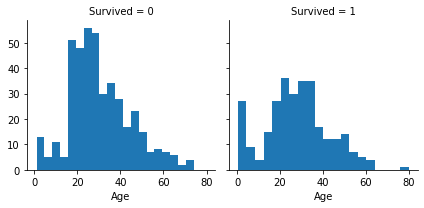

In [22]:
print('Histogram for Age in Survived Category')
X = sns.FacetGrid(Trainx, col='Survived')
X.map(plt.hist,'Age',bins=20)
plt.show()

Histogram for Age in Pclass Category


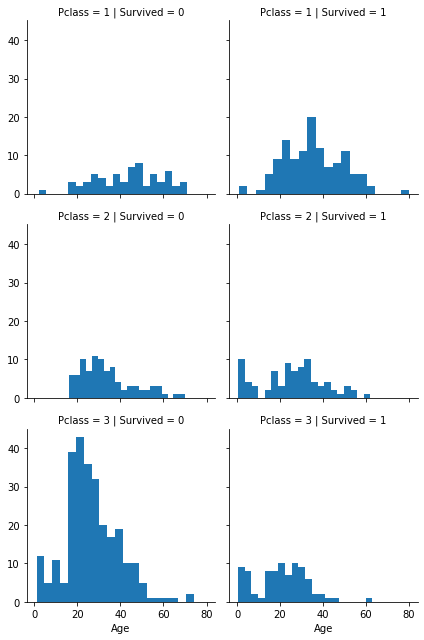

In [30]:
print('Histogram for Age in Pclass and Survived Category')
X0 = sns.FacetGrid(Trainx, col='Survived', row='Pclass')
X0.map(plt.hist,'Age',bins=20)
plt.show()

### Correlating numerical and ordinal features

**Observations**

- Pclass=3 had most passengers, however most did not survive
- Infant passengers in Pclass=2 and Pclass=3 mostly survived.
- Most passengers in Pclass=1 survived.
- Pclass varies in terms of Age distribution of passengers.

**Decisions**

- Consider Pclass for model training.

Histogram for Age in Pclass and Sex Category


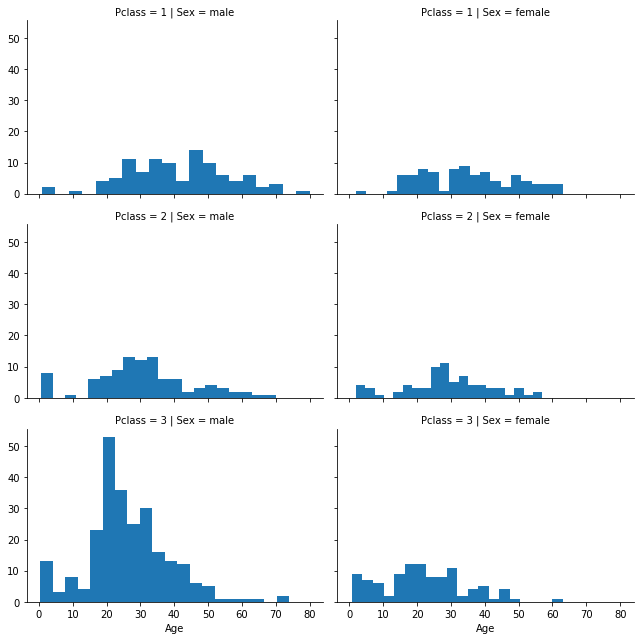

In [23]:
print('Histogram for Age in Pclass and Sex Category')
X1 = sns.FacetGrid(Trainx, col='Sex',row='Pclass',height=3,aspect=1.5)
X1.map(plt.hist,'Age',bins=20)
plt.show()

Histogram for Age in Embarked and Sex Category


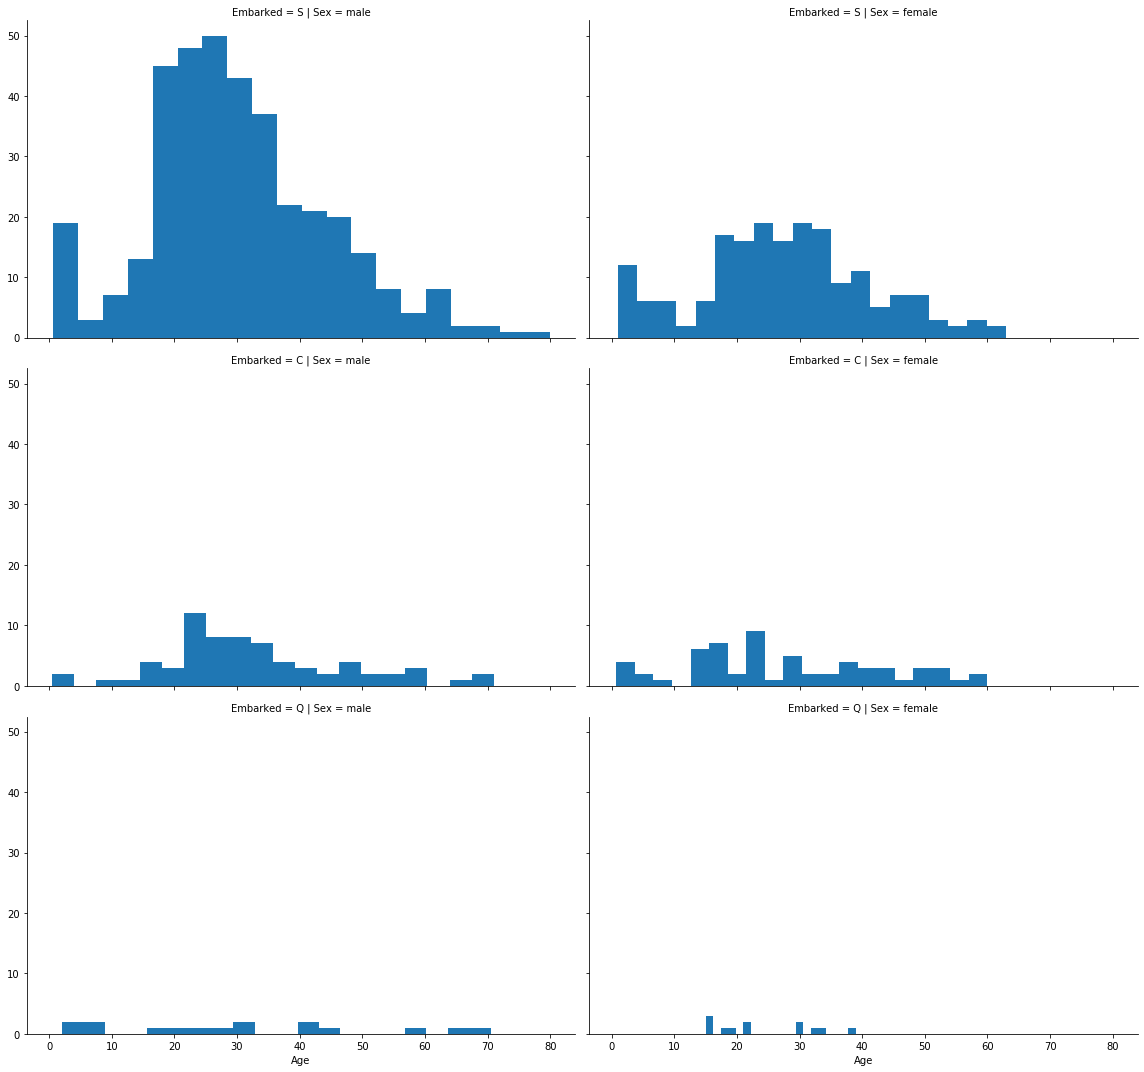

In [24]:
print('Histogram for Age in Embarked and Sex Category')
X2 = sns.FacetGrid(Trainx, col='Sex',row='Embarked',height=5,aspect=1.6)
X2.map(plt.hist,'Age',bins=20)
plt.show()

Histogram for Age in Pclass and Embarked Category


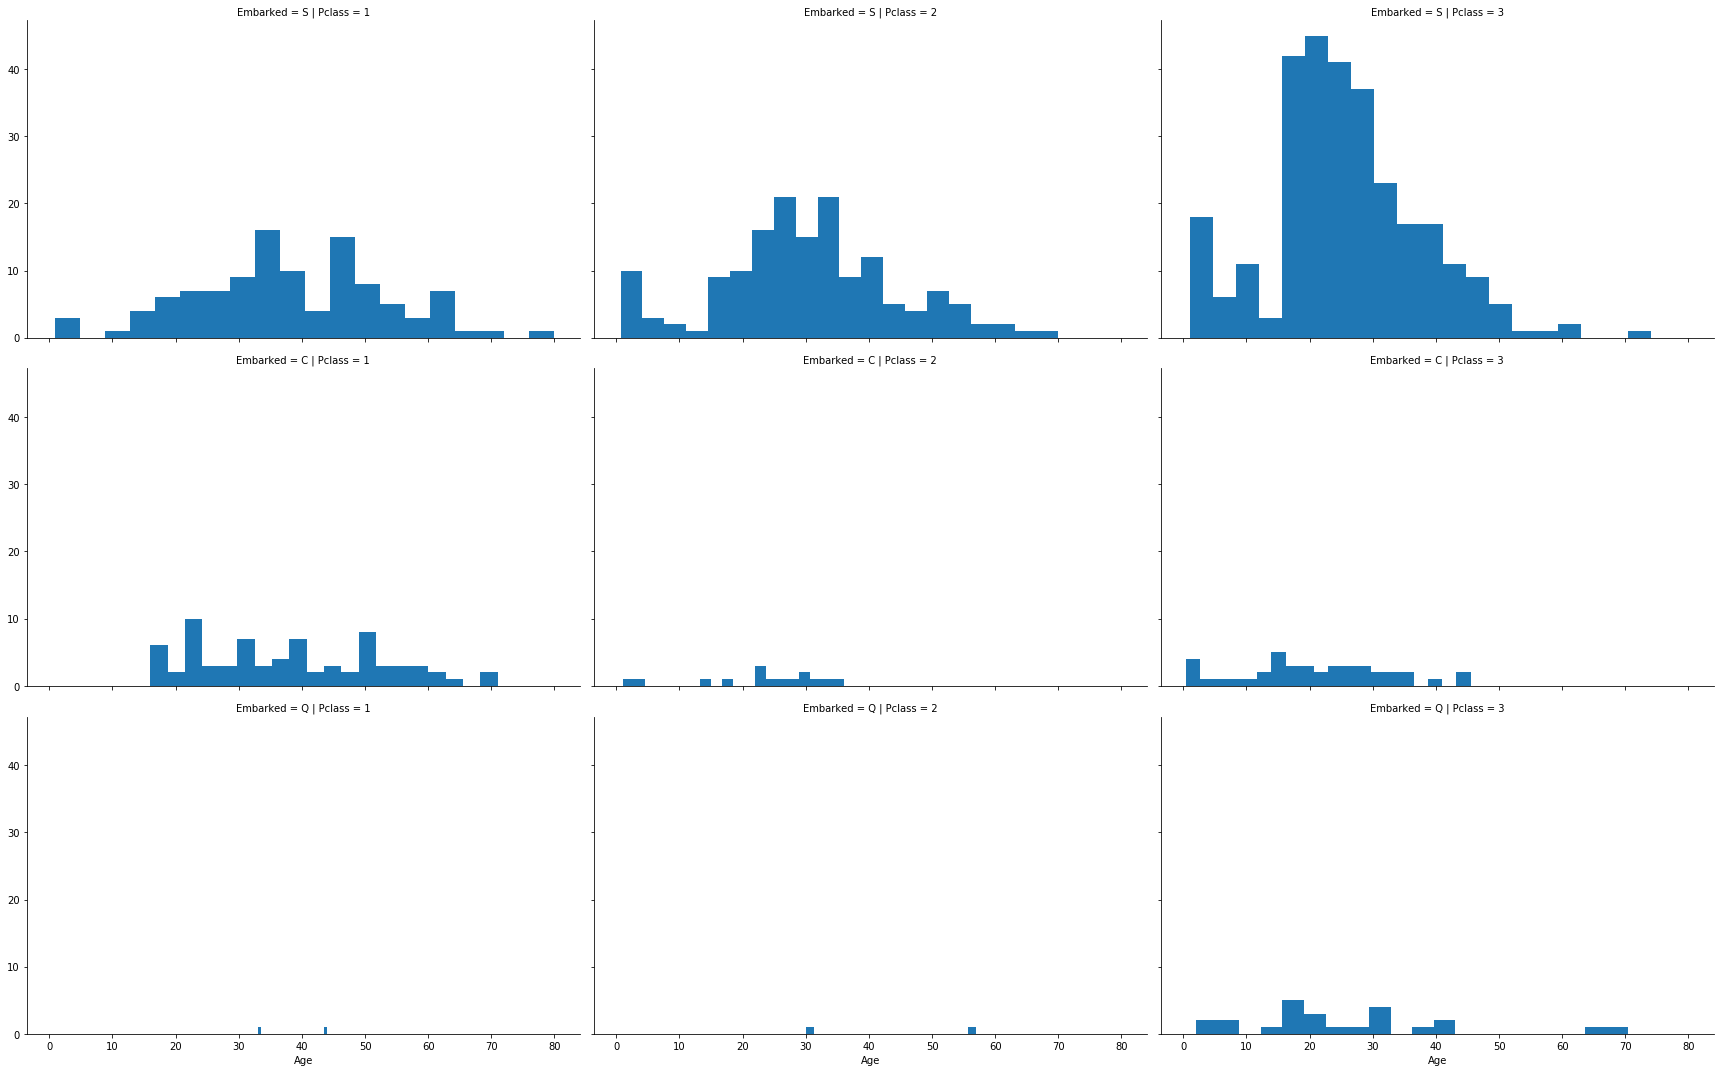

In [25]:
print('Histogram for Age in Pclass and Embarked Category')
X3 = sns.FacetGrid(Trainx, col='Pclass',row='Embarked',height=5,aspect=1.6)
X3.map(plt.hist,'Age',bins=20)
plt.show()

Histogram for Age in Embarked Category


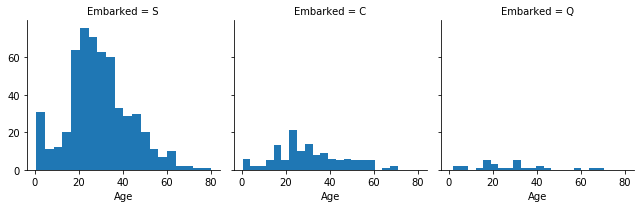

In [26]:
print('Histogram for Age in Embarked Category')
X4 = sns.FacetGrid(Trainx, col='Embarked')
X4.map(plt.hist,'Age',bins=20)
plt.show()

### Correlating categorical features

**Observations**

- Female passengers had much better survival rate than males.
- Exception in Embarked=C where males had higher survival rate. This could be a correlation between Pclass and Embarked and in turn Pclass and Survived, not necessarily direct correlation between Embarked and Survived.
- Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports.
- Ports of embarkation have varying survival rates for Pclass=3 and among male passengers.

**Decisions**

- Add Sex feature to model training.
- Complete and add Embarked feature to model training.

c:\program files\python36\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\program files\python36\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


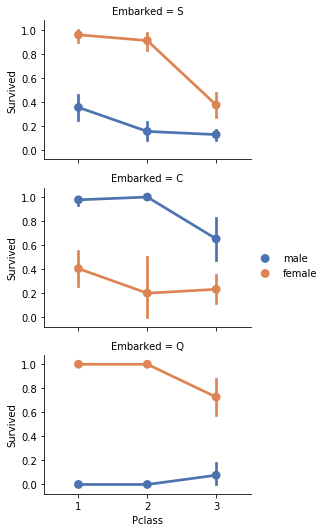

In [27]:
Linex = sns.FacetGrid(Trainx, row='Embarked', height=2.5, aspect=1.5)
Linex.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
Linex.add_legend()
plt.show()

### Correlating categorical and numerical features

**Observations.**

- Higher fare paying passengers had better survival.
- Port of embarkation correlates with survival rates.

**Decisions.**

- Consider banding Fare feature.

c:\program files\python36\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


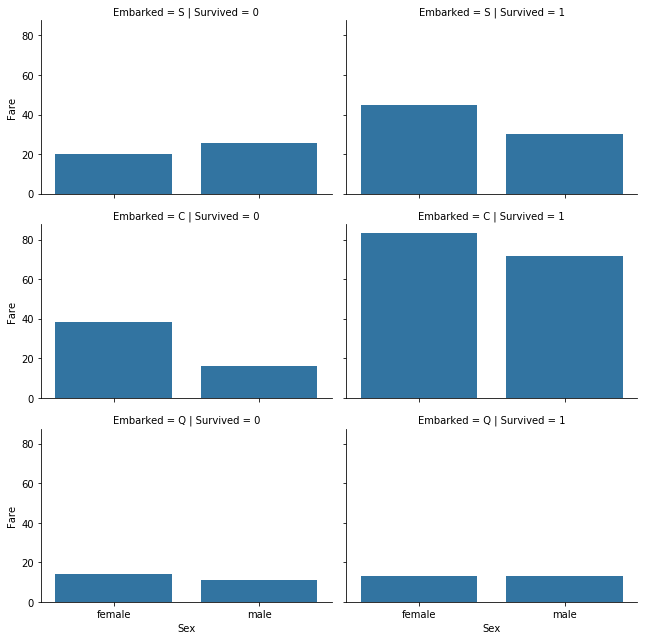

In [34]:
X5 = sns.FacetGrid(Trainx, row='Embarked', col='Survived',height=3,aspect=1.5)
X5.map(sns.barplot, 'Sex', 'Fare', ci=None)
X5.add_legend()
plt.show()

Histogram for Fare in Survived Category


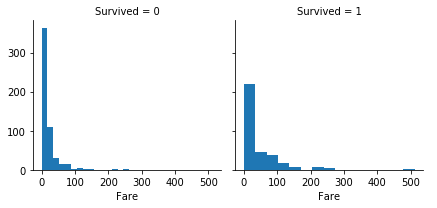

In [47]:
print('Histogram for Fare in Survived Category')
X6 = sns.FacetGrid(Trainx, col='Survived')
X6.map(plt.hist,'Fare',bins=15)
X6.add_legend()
plt.show()